In [1]:
env = "HalfCheetah-v2"
alg = "gaifo"
opponent = "PPO"
seeds = "_40_41_" 
friction = False
best = False
include_PPO = False
mismatch=1.5

In [2]:
import pickle
import sys
sys.path.insert(0, "../../PyTorch-RL/")
from utils import plot
import numpy as np

In [3]:
with open("DataCompareAlphas" + env + seeds + "friction"+ str(friction)+ "gaifo.p", "rb") as f: #DataCompareAlphasHalfCheetah-v2_40_41_frictionFalseairl
    data = pickle.load(f)

with open("DataCompareAlphas" + env + seeds + "friction"+ str(friction)+"airl.p", "rb") as f:
    dataAIRL = pickle.load(f)
lines = []
std = []
"""for d in data[0]:
    lines.append(d[1:-1])
for d in data[1]:
    std.append(d[1:-1])"""

'for d in data[0]:\n    lines.append(d[1:-1])\nfor d in data[1]:\n    std.append(d[1:-1])'

In [4]:
linesAIRL, stdAIRL, labelsAIRL = dataAIRL[0], dataAIRL[1], dataAIRL[2]
lines, std, labels = data[0], data[1], data[2]
new_labels = [ "1.0", "0.999", "0.99", "0.98", "0.97", "0.96", "0.95", "0.9", "AIRL"]
lines.pop(3)
std.pop(3)

array([263.16373269, 222.35419679, 231.09304567, 308.07666297,
        24.39959688])

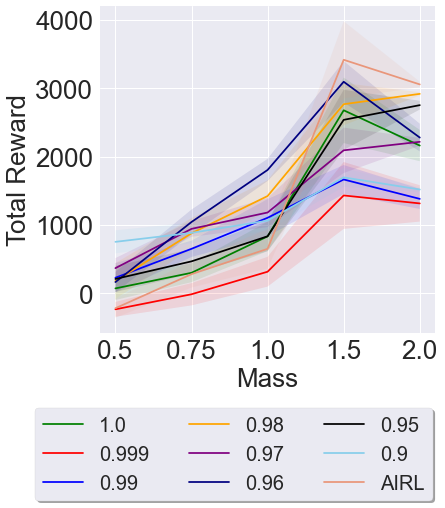

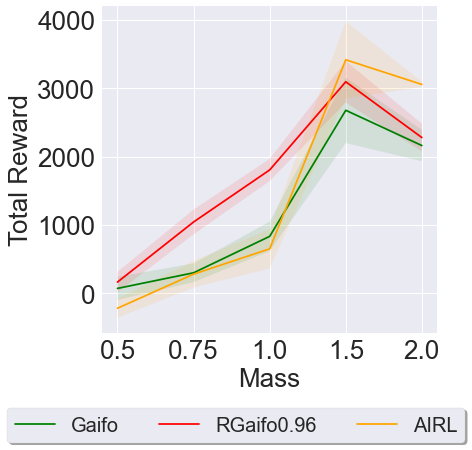

In [6]:
lines += linesAIRL
std += stdAIRL
plot.plot_lines_and_ranges(list_to_plot=lines,
                           list_sigmas=std,
                           list_name= new_labels,
                           axis_label=["Mass", "Total Reward"] if not friction else ["Friction", "Total Reward"],
                           folder="../",
                           title="Test"+alg+env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent+"MEevallegendTrueAIRL"+str(mismatch),
                           x_axis=["0.5", "0.75", "1.0", "1.5", "2.0"],
                           legend = True)
plot.plot_lines_and_ranges(list_to_plot=[lines[0]]+[lines[5]] + [lines[-1]],
                           list_sigmas=[std[0]] + [std[5]] + [std[-1]],
                           list_name= ["Gaifo"] + ["RGaifo" + new_labels[5]] + ["AIRL"],
                           axis_label=["Mass", "Total Reward"] if not friction else ["Friction", "Total Reward"],
                           folder="../",
                           title="Test"+alg+env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent+"MEevallegendTrueBestAIRL"+str(mismatch),
                           x_axis=["0.5", "0.75", "1.0", "1.5", "2.0"],
                           legend = True,
                           color_list_custom = ["green", "red", "orange"])

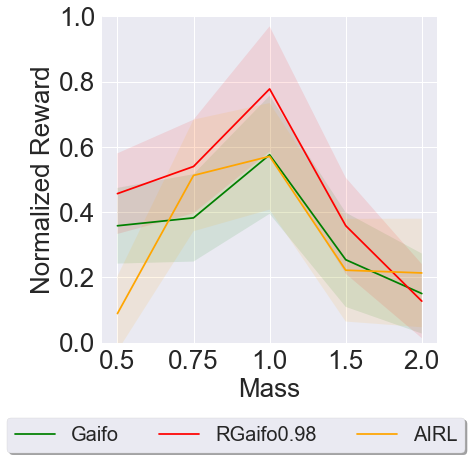

In [8]:
with open("DataCompareAlphas" + env + seeds + "frictionFalseexpertMEeval_small_range.p", "rb") as f: #DataCompareAlphasHalfCheetah-v2['40', '41']frictionFalseexpertMEeval_small_range
    data = pickle.load(f)
lines, std, labels = data[0], data[1], data[2]
new_labels = [ "1.0", "0.999", "0.99", "0.98", "0.97", "0.96", "0.95", "0.9"]
lines.pop(0)
std.pop(0)
reward_max = 5053.
random_min = -602.
delta = reward_max -random_min
lines += linesAIRL
std += stdAIRL
for j,item in enumerate(zip(lines, std)):
    lines[j] = item[0]/delta - random_min/delta 
    std[j] = item[1]/delta - random_min/delta 
plot.plot_lines_and_ranges(list_to_plot=[lines[0]]+[lines[3]] + [lines[-1]],
                           list_sigmas=[std[0]] + [std[3]] + [std[-1]],
                           list_name= ["Gaifo"] + ["RGaifo" + new_labels[3]] + ["AIRL"],
                           axis_label=["Mass", "Normalized Reward"] if not friction else ["Friction", "Normalized Reward"],
                           folder="../",
                           title=alg+env+ "best" + str(best)+seeds+"friction"+str(friction)+opponent+"MEevallegendTrueNormalizedBestAIRL",
                           x_axis=["0.5", "0.75", "1.0", "1.5", "2.0"],
                           legend = True,
                           ylim=[0,1],
                           color_list_custom = ["green", "red", "orange"])